## Solutions

In [90]:
import matplotlib.pyplot as plt
%matplotlib inline

### Exercise 1

This code does the job

In [91]:
def p(x, coef):
    X = np.empty(len(coef))
    X[0] = 1
    X[1:] = x
    y = np.cumprod(X)   # y = [1, x, x**2,...]
    return coef @ y

Let’s test it

In [92]:
coef = np.ones(3)
print(coef)
print(p(1, coef))
# For comparison
q = np.poly1d(coef)
print(q(1))

[1. 1. 1.]
3.0
3.0


### Exercise 2

Here’s our first pass at a solution:

In [93]:
from numpy import cumsum
from numpy.random import uniform

class DiscreteRV:
    """
    Generates an array of draws from a discrete random variable with vector of
    probabilities given by q.
    """

    def __init__(self, q):
        """
        The argument q is a NumPy array, or array like, nonnegative and sums
        to 1
        """
        self.q = q
        self.Q = cumsum(q)

    def draw(self, k=1):
        """
        Returns k draws from q. For each such draw, the value i is returned
        with probability q[i].
        """
        return self.Q.searchsorted(uniform(0, 1, size=k))

The logic is not obvious, but if you take your time and read it slowly,
you will understand

There is a problem here, however

Suppose that `q` is altered after an instance of `discreteRV` is
created, for example by

In [94]:
q = (0.1, 0.9)
d = DiscreteRV(q)
d.q = (0.5, 0.5)

The problem is that `Q` does not change accordingly, and `Q` is the
data used in the `draw` method

To deal with this, one option is to compute `Q` every time the draw
method is called

But this is inefficient relative to computing `Q` once off

A better option is to use descriptors

A solution from the [quantecon
library](https://github.com/QuantEcon/QuantEcon.py/tree/master/quantecon)
using descriptors that behaves as we desire can be found
[here](https://github.com/QuantEcon/QuantEcon.py/blob/master/quantecon/discrete_rv.py)

### Exercise 3

An example solution is given below

In essence we’ve just taken [this
code](https://github.com/QuantEcon/QuantEcon.py/blob/master/quantecon/ecdf.py)
from QuantEcon and added in a plot method

In [95]:
"""
Modifies ecdf.py from QuantEcon to add in a plot method

"""

class ECDF:
    """
    One-dimensional empirical distribution function given a vector of
    observations.

    Parameters
    ----------
    observations : array_like
        An array of observations

    Attributes
    ----------
    observations : array_like
        An array of observations

    """

    def __init__(self, observations):
        self.observations = np.asarray(observations)

    def __call__(self, x):
        """
        Evaluates the ecdf at x

        Parameters
        ----------
        x : scalar(float)
            The x at which the ecdf is evaluated

        Returns
        -------
        scalar(float)
            Fraction of the sample less than x

        """
        return np.mean(self.observations <= x)

    def plot(self, a=None, b=None):
        """
        Plot the ecdf on the interval [a, b].

        Parameters
        ----------
        a : scalar(float), optional(default=None)
            Lower end point of the plot interval
        b : scalar(float), optional(default=None)
            Upper end point of the plot interval

        """

        # === choose reasonable interval if [a, b] not specified === #
        if a is None:
            a = self.observations.min() - self.observations.std()
        if b is None:
            b = self.observations.max() + self.observations.std()

        # === generate plot === #
        x_vals = np.linspace(a, b, num=100)
        f = np.vectorize(self.__call__)
        plt.plot(x_vals, f(x_vals))
        plt.show()

Here’s an example of usage

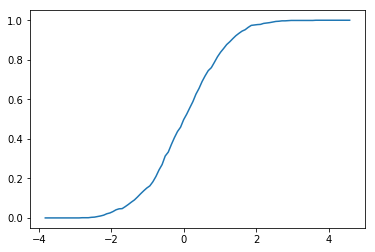

In [96]:
X = np.random.randn(1000)
F = ECDF(X)
F.plot()